In [23]:
# Data manipulation and analysis library
import pandas as pd 

# Numerical computing library
import numpy as np

# Machine learning library
import sklearn

# Plotting library
import matplotlib.pyplot as pyplot

# Module for object serialization and de-serialization
import pickle

# Import linear regression models
from sklearn import linear_model

# Utility for shuffling data
from sklearn.utils import shuffle

# Styling for matplotlib
from matplotlib import style

In [24]:
# Read a CSV file into a pandas DataFrame
data = pd.read_csv("Forrestfires.csv", sep=",")

# Print the first few rows of the DataFrame
print(data.head())


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [25]:
# Select specific columns from the DataFrame
data = data[["temp", "RH", "wind", "ISI", "DC", "rain"]]

# Print the first few rows of the modified DataFrame
print(data.head())

   temp  RH  wind  ISI     DC  rain
0   8.2  51   6.7  5.1   94.3   0.0
1  18.0  33   0.9  6.7  669.1   0.0
2  14.6  33   1.3  6.7  686.9   0.0
3   8.3  97   4.0  9.0   77.5   0.2
4  11.4  99   1.8  9.6  102.2   0.0


In [26]:
# Define the target variable
predict = "temp"

# Create feature matrix X by dropping the target variable
x = np.array(data.drop(predict, axis=1))

# Create target vector y
y = np.array(data[predict])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [27]:
# Create a linear regression model
Linear = linear_model.LinearRegression()

# Train the model on the training data
Linear.fit(x_train, y_train)

# Calculate the model's accuracy on the test data
acc = Linear.score(x_test, y_test)

# Print the accuracy
print(acc)

0.6737916724655473


In [28]:
# Save the model to a file
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(Linear, f)

# Load the model from the file
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

# Print model coefficients and intercept
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

# Make predictions on the test set
predictions = linear.predict(x_test)

# Print predictions alongside actual features and target values
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

Coefficient: 
 [-0.1656603  -0.47349622  0.32490347  0.00928543  1.84005367]
Intercept: 
 19.996029537179183
20.801877013536966 [ 43.    3.1   8.1 728.6   0. ] 17.2
22.90355346411671 [ 39.    2.7  10.2 789.7   0. ] 19.7
19.717382169291692 [ 50.    2.7   8.8 691.8   0. ] 13.8
21.724751024476912 [ 36.    3.6   8.1 728.6   0. ] 25.3
19.00044434117818 [ 55.    5.4  11.4 750.5   0. ] 20.6
16.032166839734327 [ 38.    4.5   7.1 232.1   0. ] 19.2
25.288918760052916 [ 26.    2.7  14.3 671.2   0. ] 33.3
11.810739599699275 [40.   5.4  2.1 34.   0. ] 13.9
11.889951377716427 [53.   2.2  3.9 48.3  0. ] 12.4
23.539221169413043 [ 35.    1.8  10.1 744.4   0. ] 26.7
18.723606138163966 [ 56.    2.2   6.3 753.8   0. ] 20.4
19.71717463624161 [ 35.    2.7   1.9 665.6   0. ] 27.8
21.256892079517392 [ 34.    2.2   3.7 725.1   0. ] 21.8
15.955287609228243 [ 67.    2.2   4.8 704.4   0. ] 17.8
18.739151726585106 [ 25.    4.9   7.5 298.1   0. ] 20.7
20.93218458841821 [ 45.    3.6   6.8 849.3   0. ] 19.4
10.966289

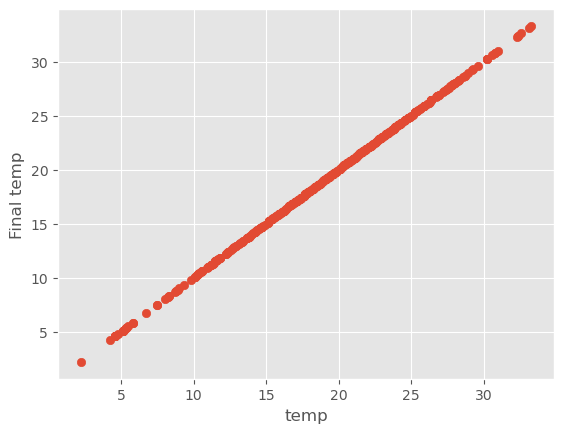

In [29]:
# Set the style for the plot
style.use("ggplot")

# Define the predictor variable to plot
p = "temp"

# Create a scatter plot
pyplot.scatter(data[p], data["temp"])

# Set the x-axis label
pyplot.xlabel(p)

# Set the y-axis label
pyplot.ylabel("Final temp")

# Display the plot
pyplot.show()